# Lots of random figures

This notebook contains lots of randomly generated figures. Enjoy. :-)

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
import plot_likert

In [3]:
# We're about to make a bunch of figures. Avoid getting warned about this.
mpl.rcParams['figure.max_open_warning'] = 100

In [4]:
rng = np.random.default_rng(seed=42)

In [5]:
def get_random_probabilities():
    """
    Return random probability weights for each item on a Likert scale
    (Otherwise, each choice will be weighted equally, making for uniform but boring graphs.)
    """
    random_numbers = rng.random(len(plot_likert.scales.agree))
    return random_numbers / random_numbers.sum()

In [6]:
def get_random_response_column(n):
    """
    Return n randomly chosen (and weighted) responses from the agree scale
    """
    return rng.choice(plot_likert.scales.agree, n, p=get_random_probabilities())

In [7]:
def get_random_responses(respondents, questions):
    """
    Return randomly chosen (and weighted) responses from the agree scale,
    an ndarray with <respondents> rows and <questions> columns
    """
    columns = [get_random_response_column(respondents) for i in range(questions)]
    return np.transpose(np.vstack(columns))

In [8]:
num_sample_graphs = 100
respondents_min = 5
respondents_max = 5000
questions_min = 1
questions_max = 6

# Generate random numbers of respondents for each question uniformly
#respondents_all = rng.integers(respondents_min, respondents_max, num_sample_graphs)

# Generate random numbers of respondents for each question, biasing towards fewer responses)
respondents_all = respondents_min + (rng.standard_exponential(num_sample_graphs) * 1000).astype(int)

# Generate how many questions each figure will have
questions_all = rng.integers(questions_min, questions_max, num_sample_graphs)

graphs = zip(respondents_all, questions_all)

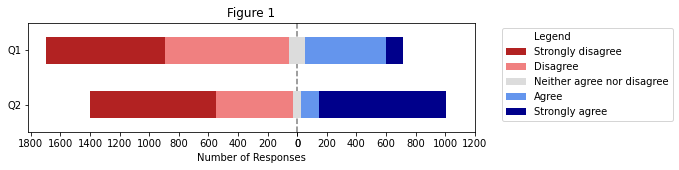

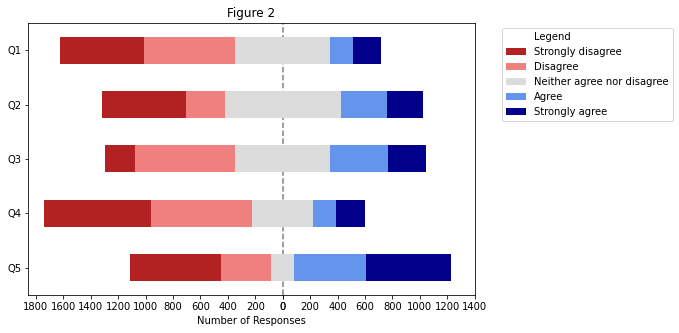

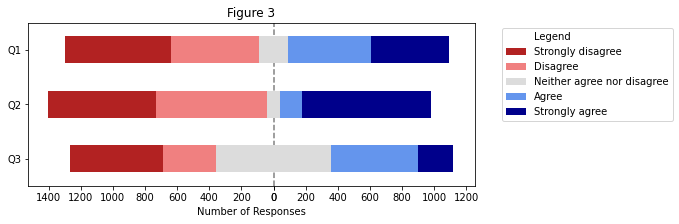

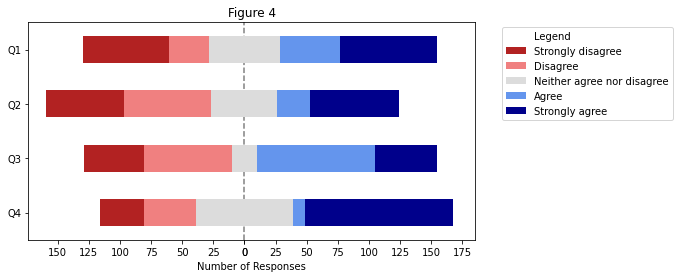

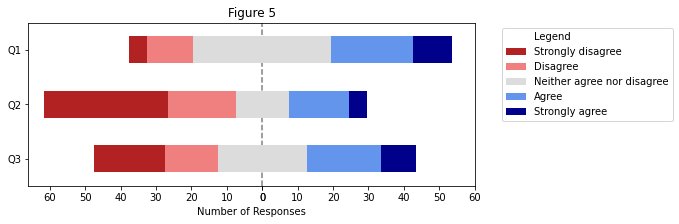

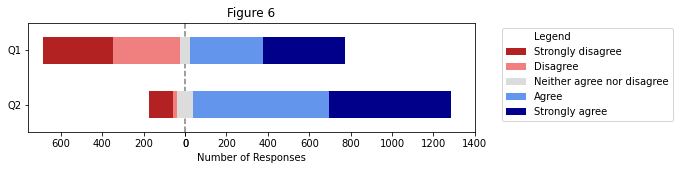

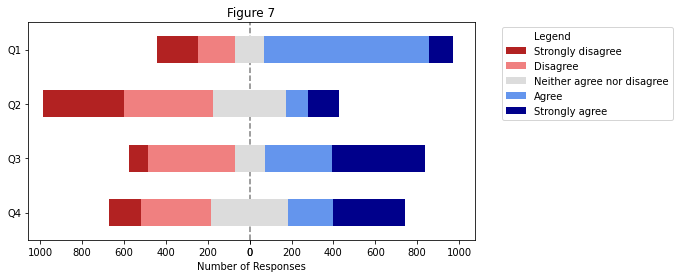

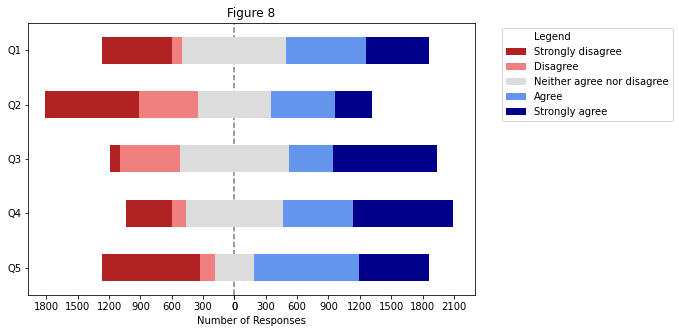

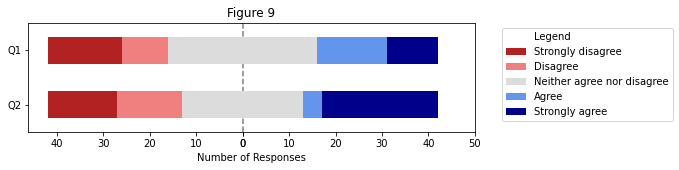

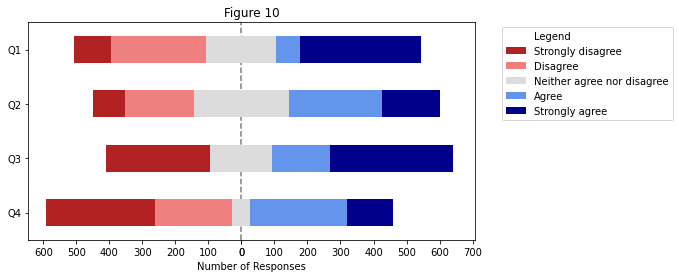

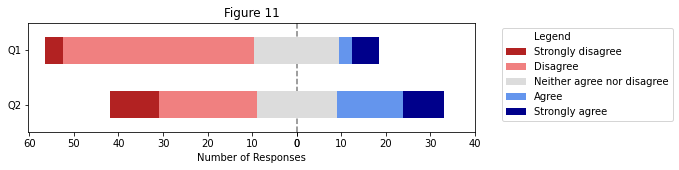

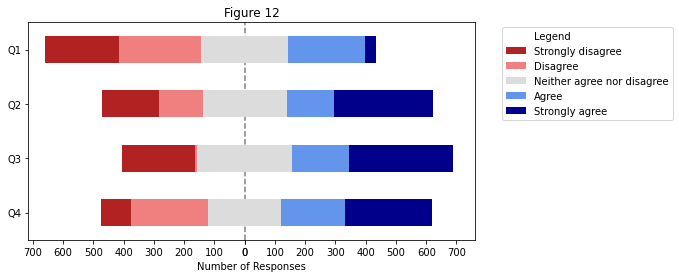

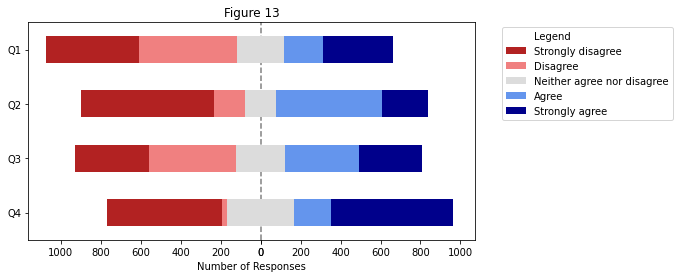

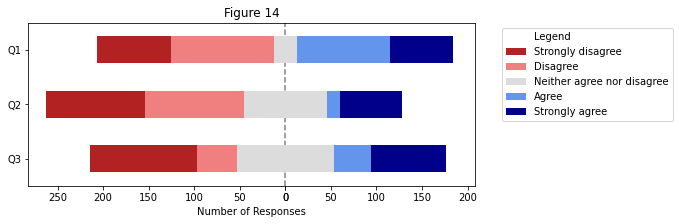

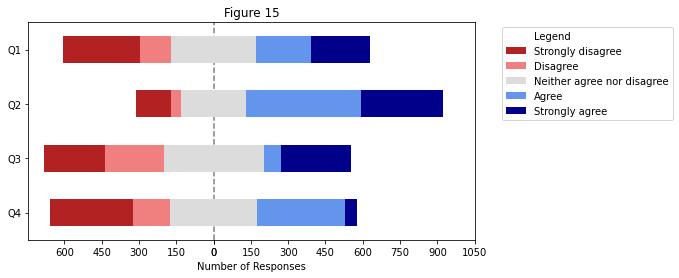

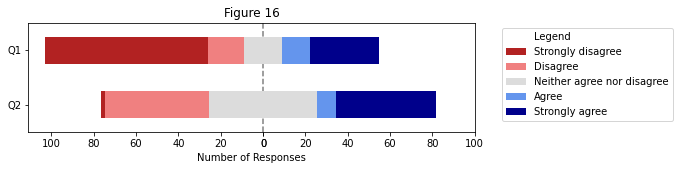

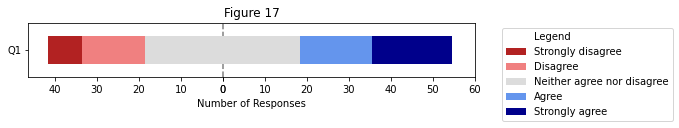

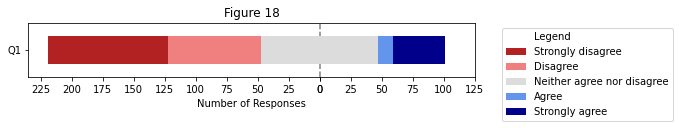

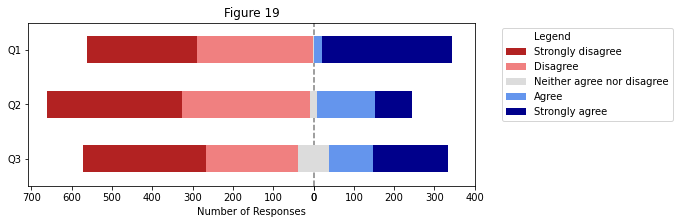

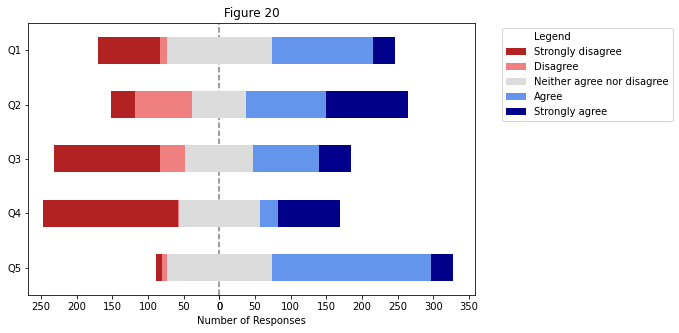

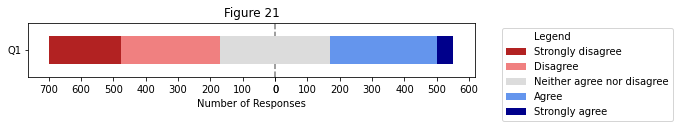

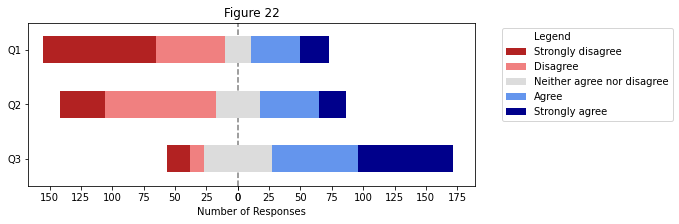

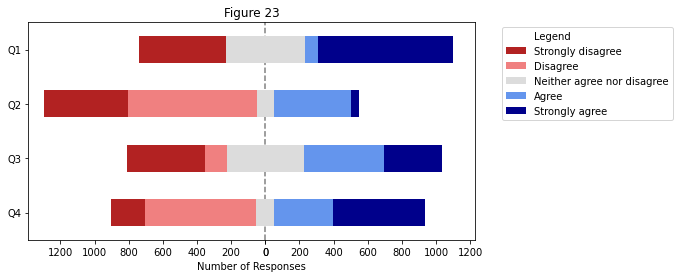

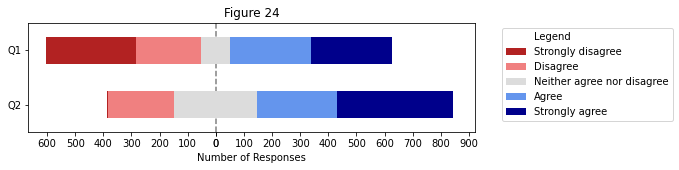

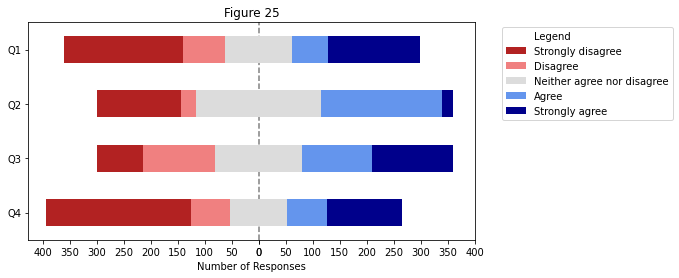

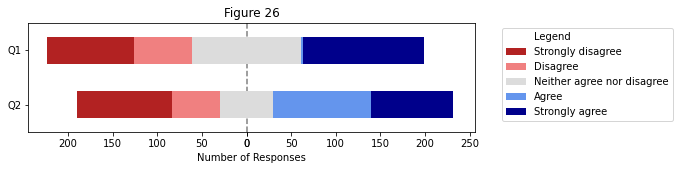

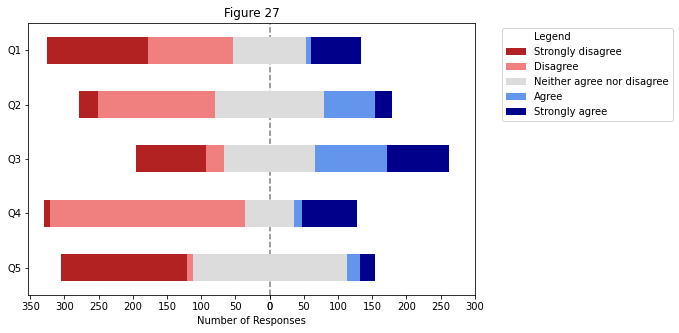

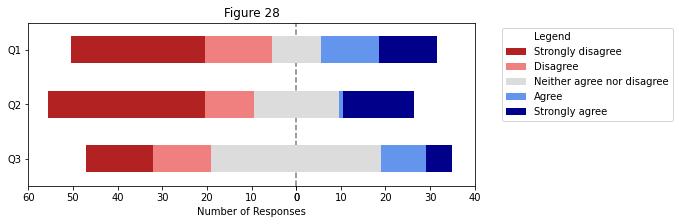

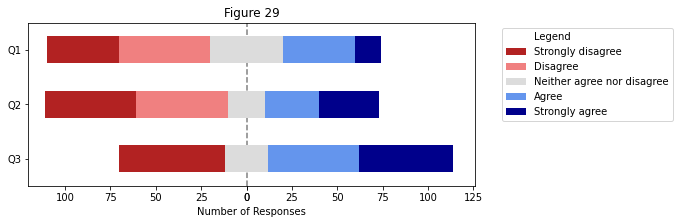

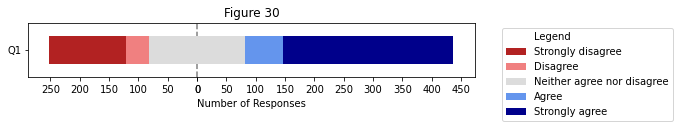

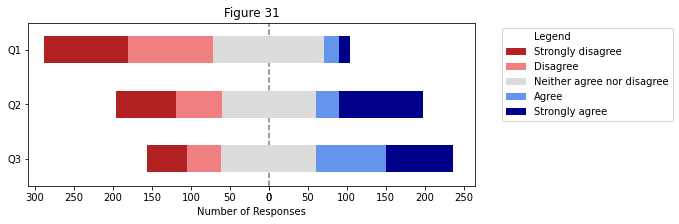

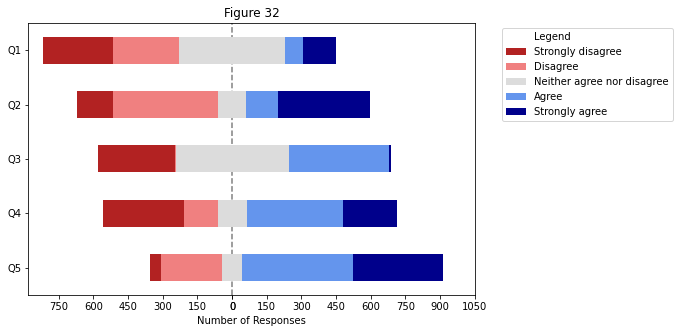

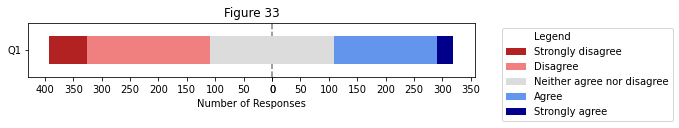

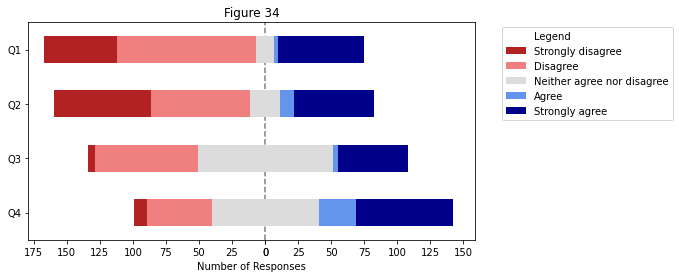

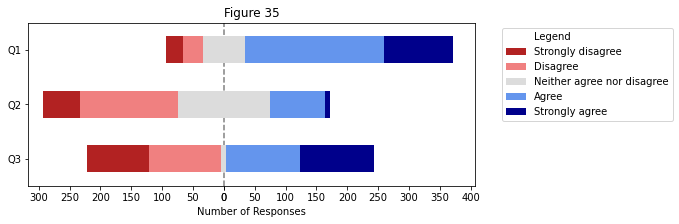

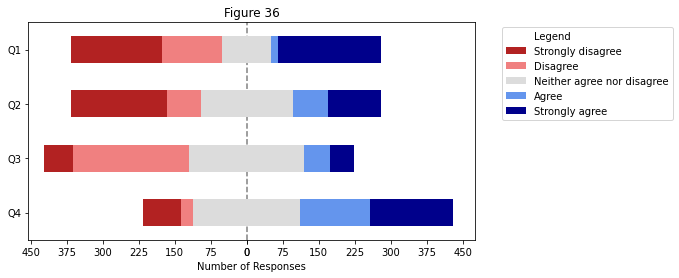

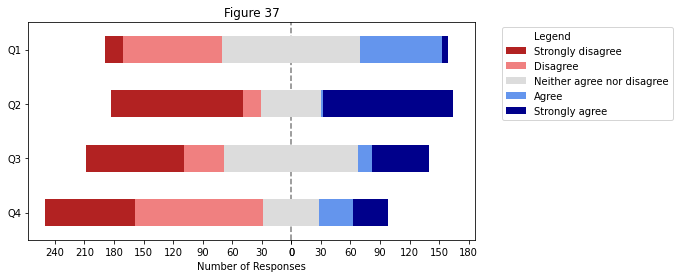

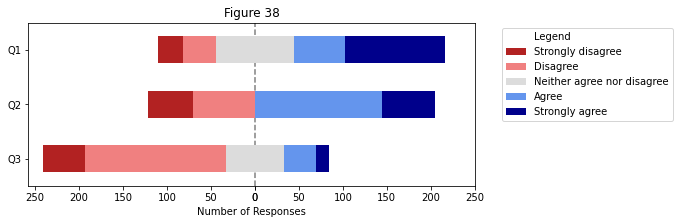

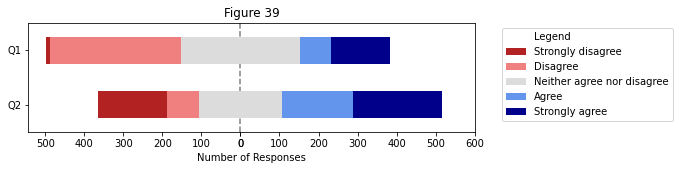

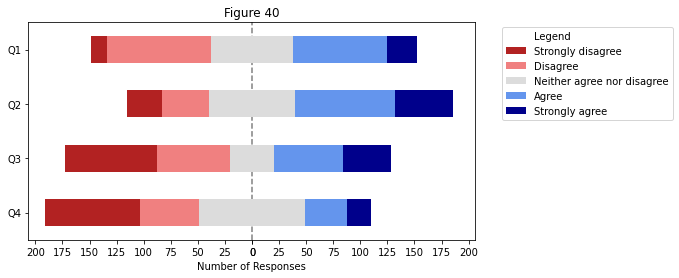

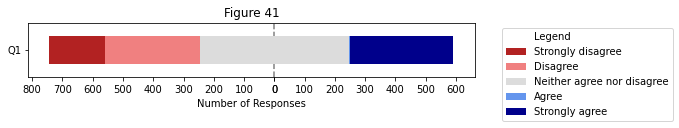

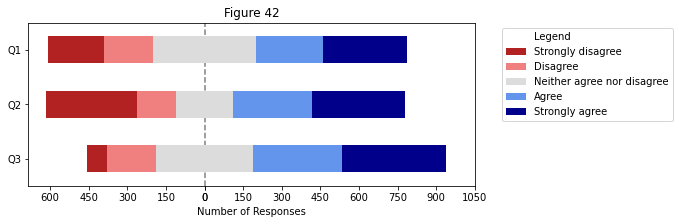

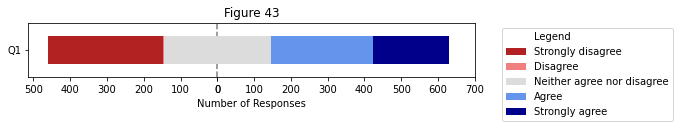

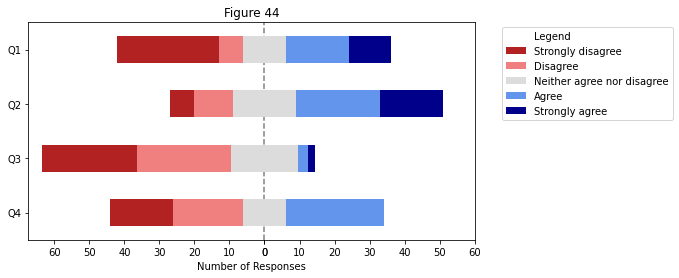

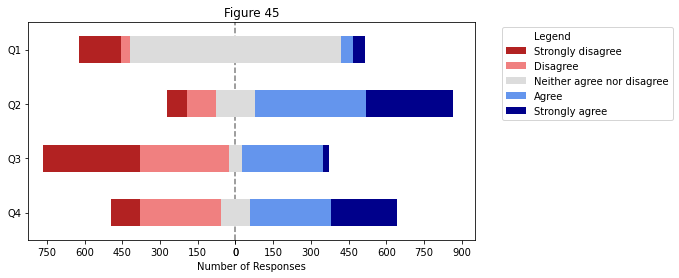

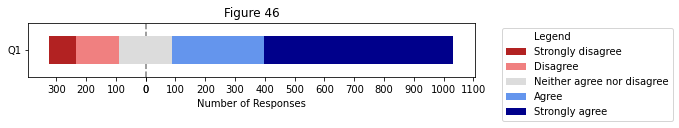

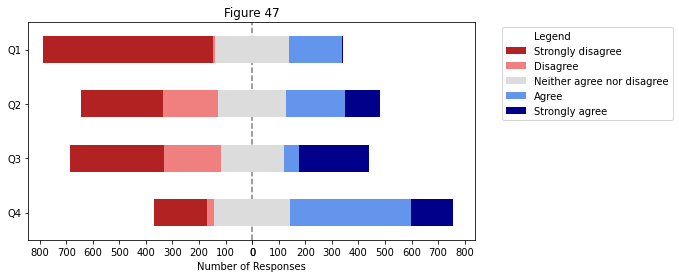

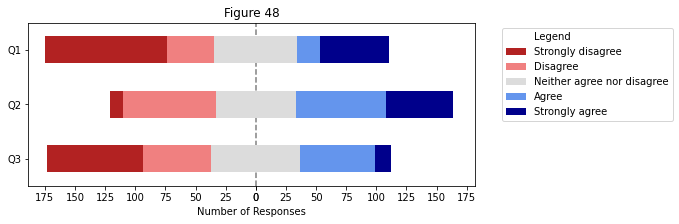

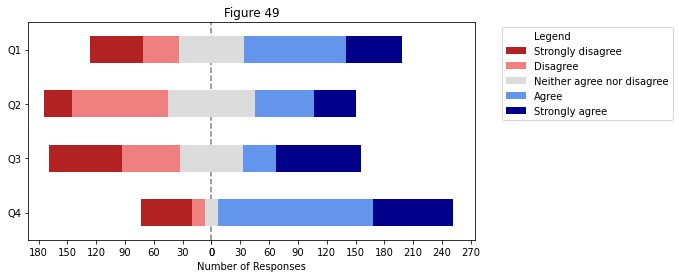

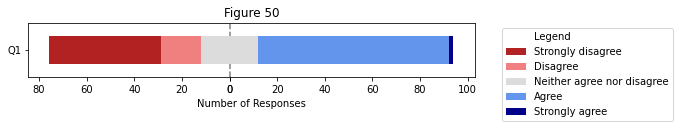

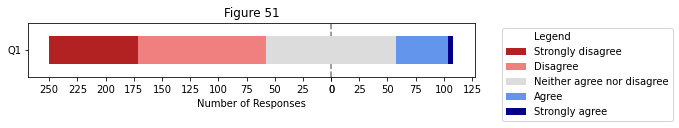

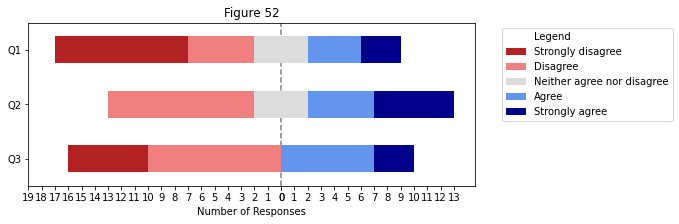

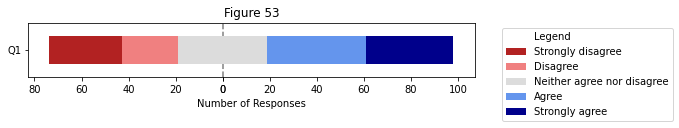

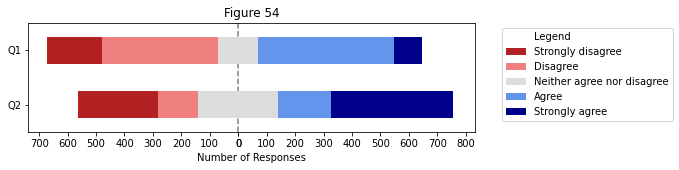

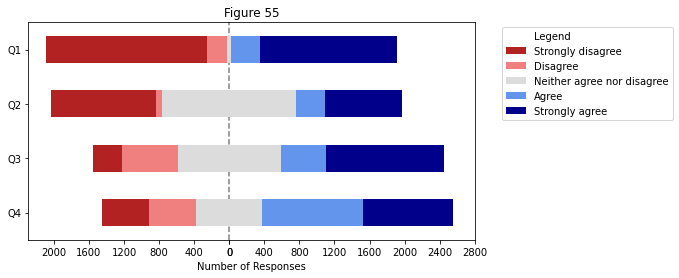

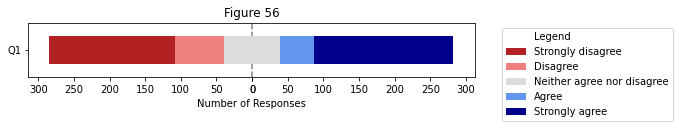

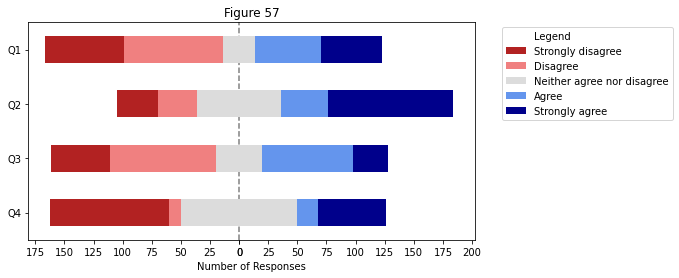

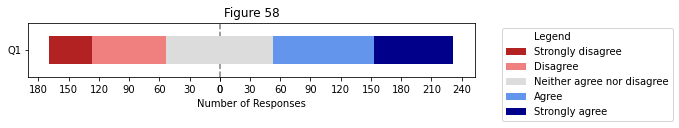

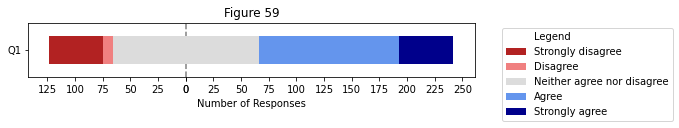

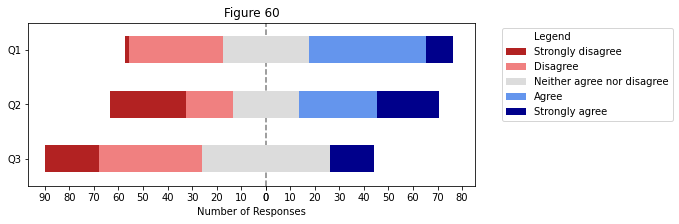

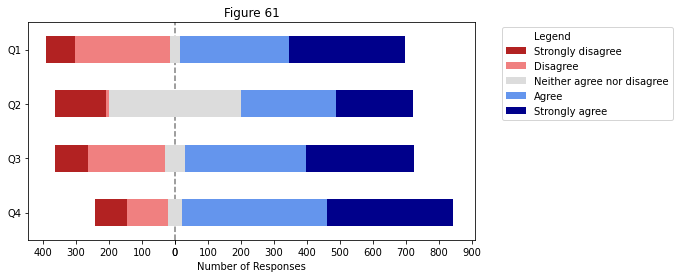

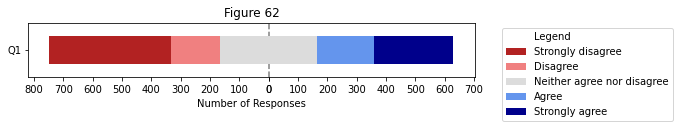

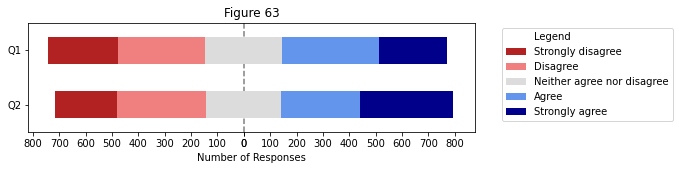

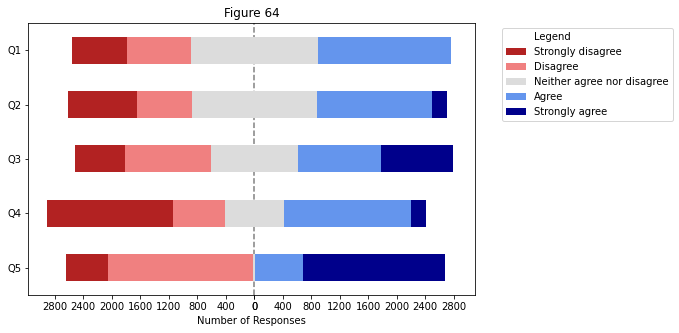

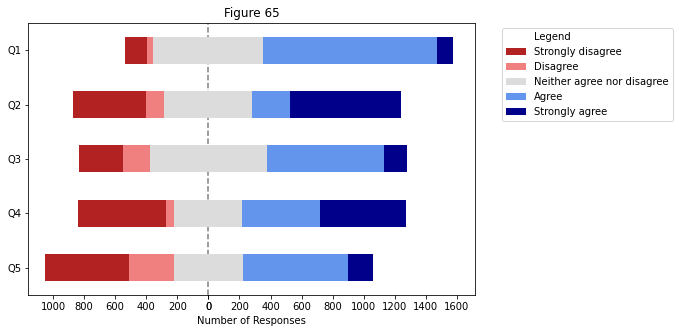

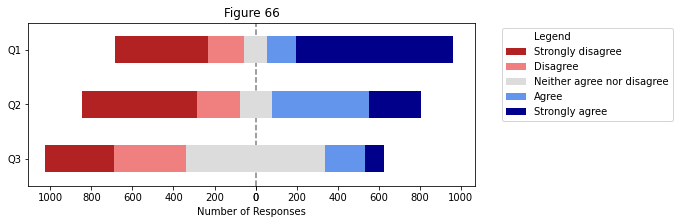

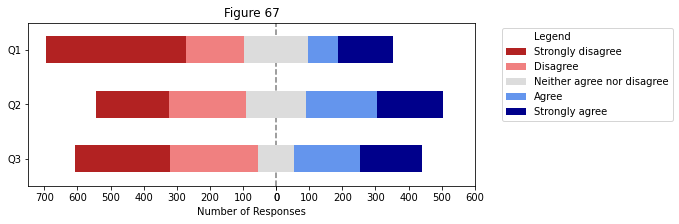

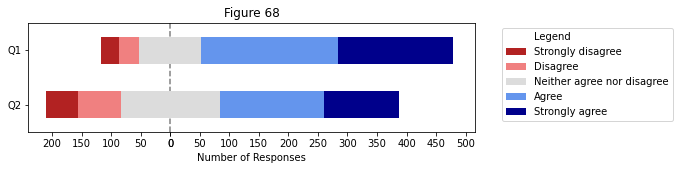

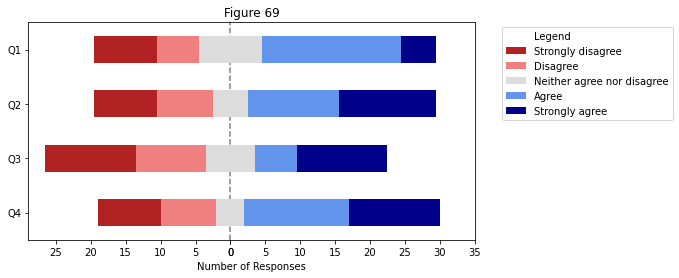

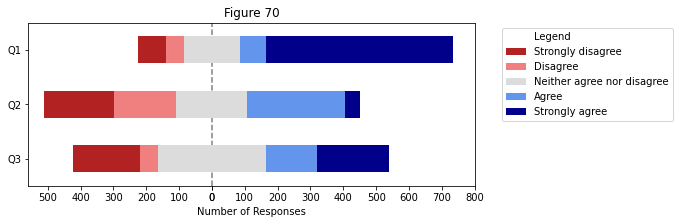

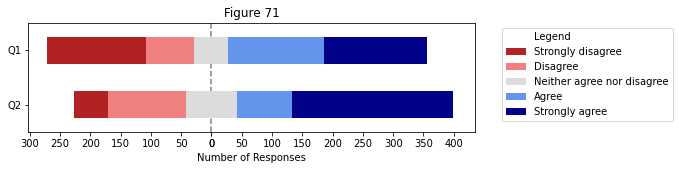

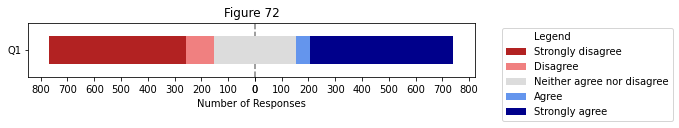

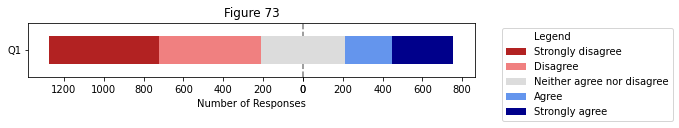

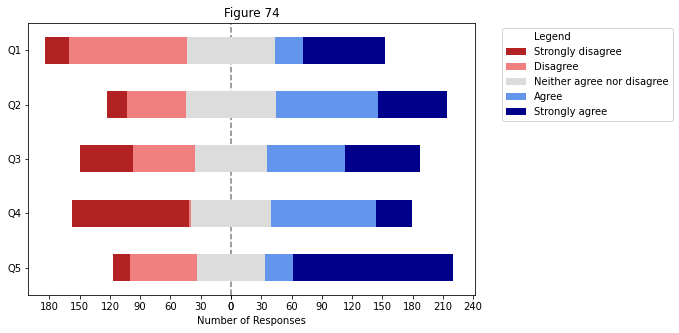

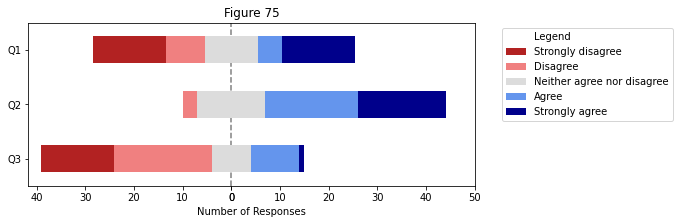

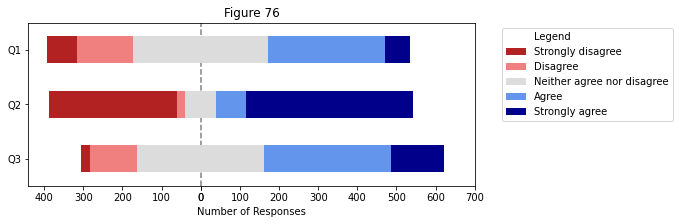

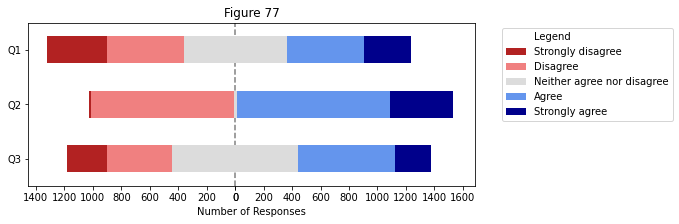

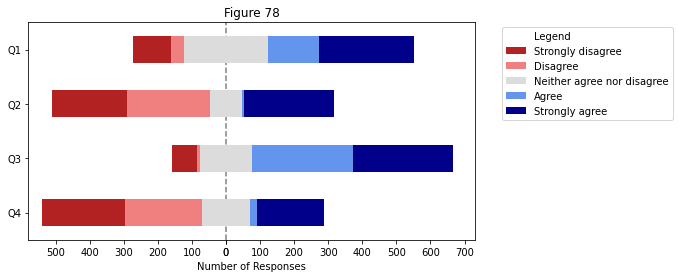

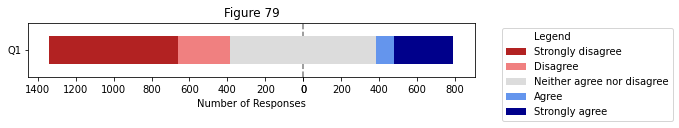

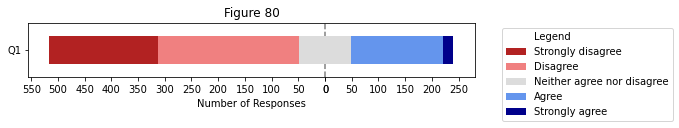

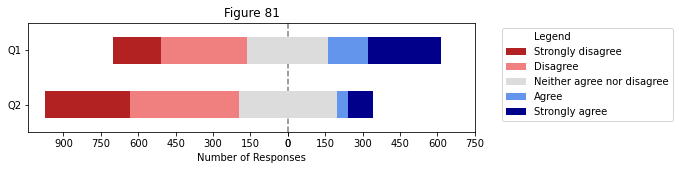

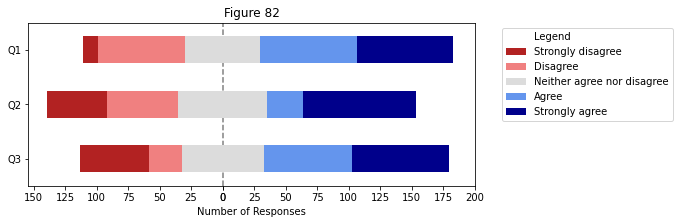

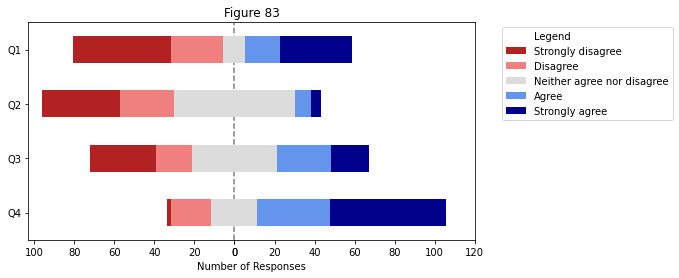

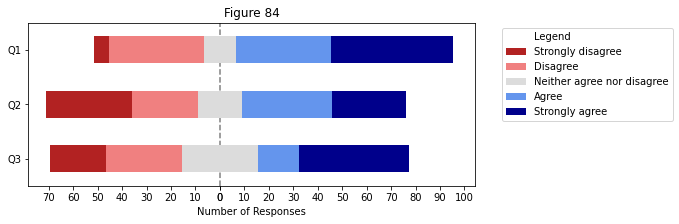

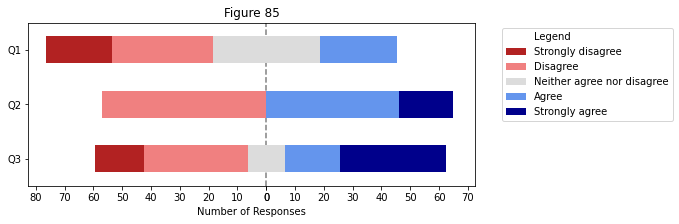

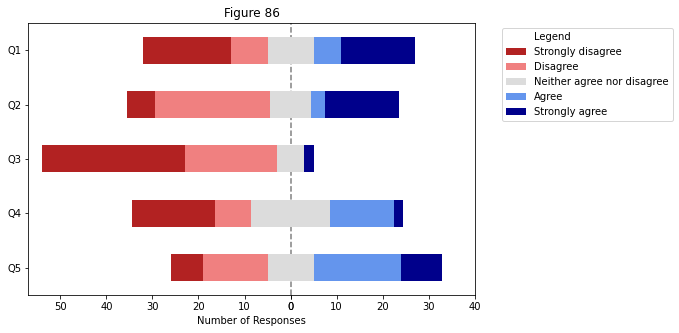

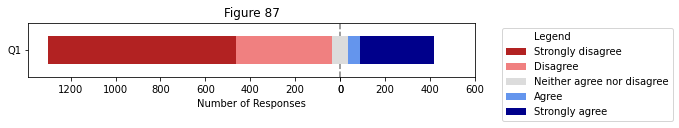

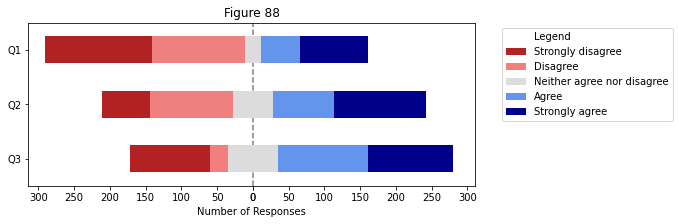

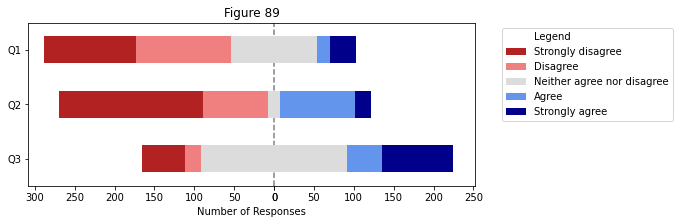

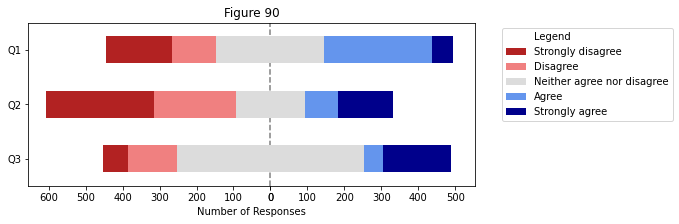

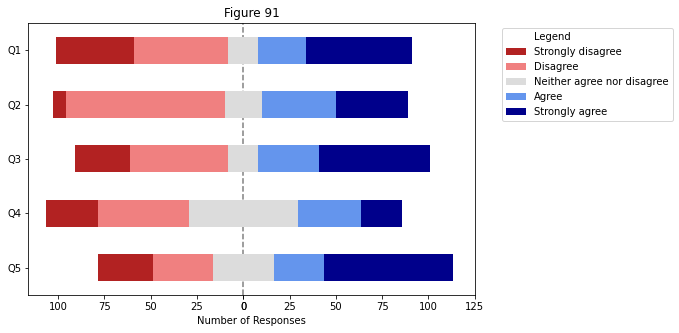

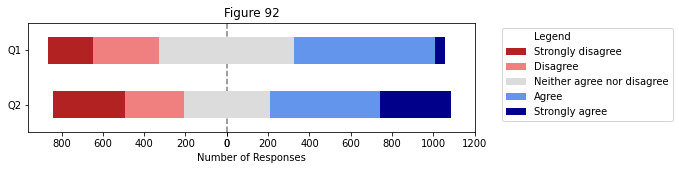

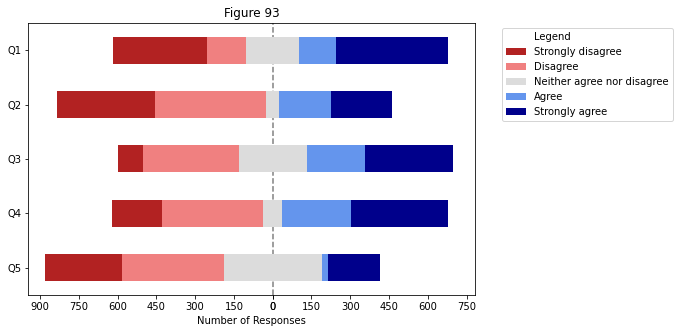

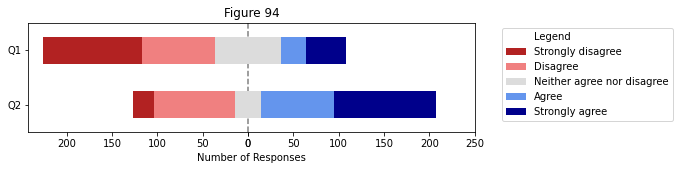

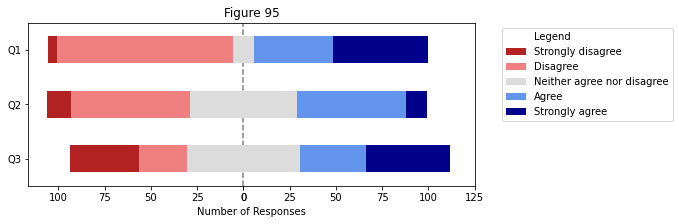

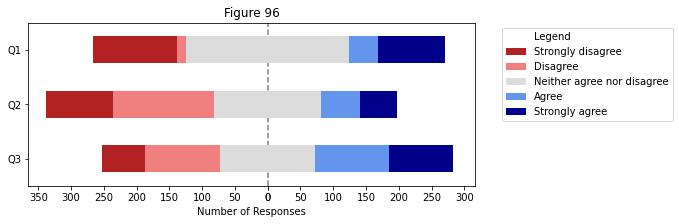

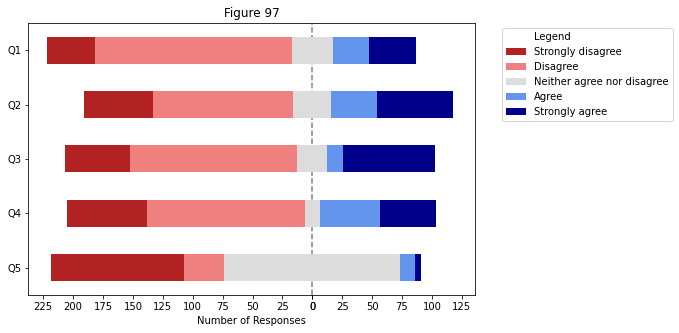

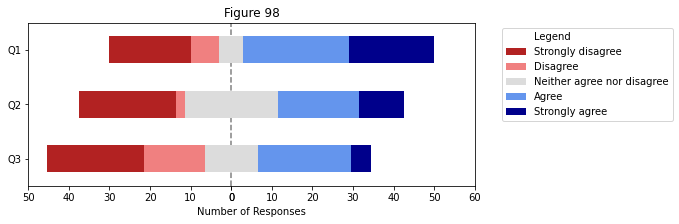

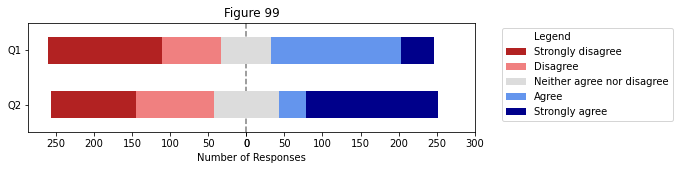

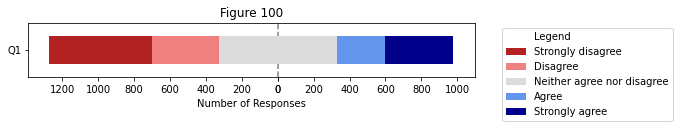

In [9]:
question_labels = ["Q" + str(i) for i in range(1, questions_max)]

for f, (respondents, questions) in enumerate(graphs):
    responses = get_random_responses(respondents, questions)
    data = pd.DataFrame(responses, columns=question_labels[0:questions])
    ax = plot_likert.plot_likert(data, plot_likert.scales.agree, figsize=(8, questions));
    ax.set_title("Figure " + str(f + 1));